<a href="https://colab.research.google.com/github/Glibbly/CryptoClustering/blob/main/Crypto_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [17]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("/content/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [18]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [19]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_data_df_scaled = StandardScaler().fit_transform(market_data_df)

In [20]:
# Create a DataFrame with the scaled data
market_data_df_scaled = pd.DataFrame(market_data_df_scaled, columns=market_data_df.columns)

# Copy the crypto names from the original data
market_data_df_scaled["coin_id"] = market_data_df.index

# Set the coinid column as index
market_data_df_scaled = market_data_df_scaled.set_index("coin_id")

# Display sample data
market_data_df_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [21]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(market_data_df_scaled)
    inertia.append(km.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
display(elbow_df)

,k,inertia
0,1,287.000000
1,2,198.571818
2,3,145.635748
3,4,79.022435
4,5,66.217780
5,6,59.139070
6,7,48.406314
7,8,38.993588
8,9,34.400595
9,10,28.573603


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

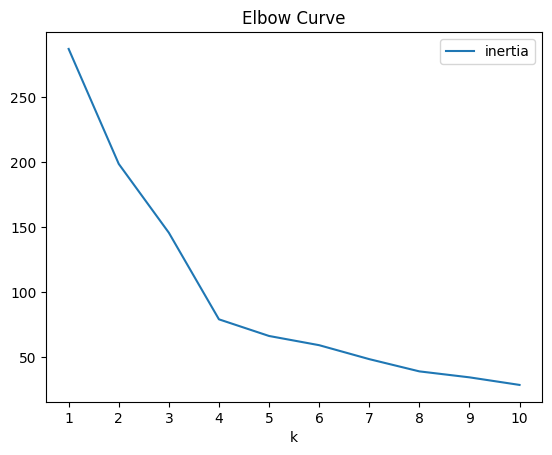

In [22]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
elbow_df.plot.line(x="k", y="inertia", title="Elbow Curve", xticks=k)

#### Answer the following question:
**Question:** What is the best value for `k`?

**Answer:** 4

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [23]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=0)

In [28]:
# Fit the K-Means model using the scaled data
model.fit(market_data_df_scaled)

KMeans(n_clusters=4, random_state=0)

In [29]:
# Predict the clusters to group the cryptocurrencies using the scaled data
market_data_df_scaled["class"] = model.predict(market_data_df_scaled)

# View the resulting array of cluster values.
market_data_df_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,class
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,1
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,1
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,1


In [30]:
# Create a copy of the DataFrame
market_data_df_scaled_predictions = market_data_df_scaled.copy()

In [31]:
# Add a new column to the DataFrame with the predicted clusters
market_data_df_scaled_predictions["class"] = model.predict(market_data_df_scaled)

# Display sample data
market_data_df_scaled_predictions.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,class
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,1
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,1
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,1


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

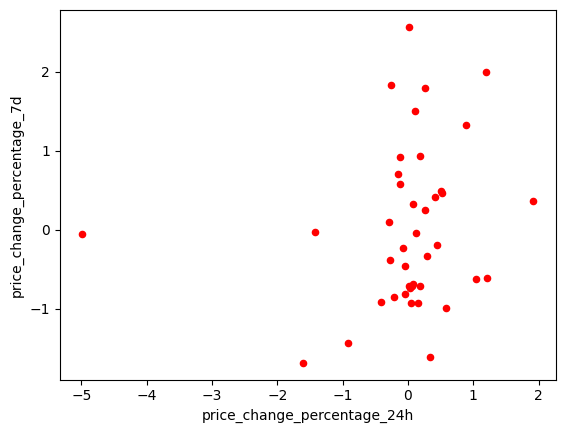

In [33]:
# Create a scatter plot using Pandas plot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
market_data_df_scaled_predictions.plot.scatter(x="price_change_percentage_24h", y="price_change_percentage_7d", color="red")

### Optimize Clusters with Principal Component Analysis.

In [34]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [35]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_data = pca.fit_transform(market_data_df_scaled)

# View the first five rows of the DataFrame.
pca_data[:5]

array([[ 1.02716415e-01,  1.09294014e+00,  5.35184395e-01],
       [ 7.67117769e-02,  7.04779064e-01,  1.03685543e+00],
       [-6.19998579e-01,  1.97690890e-02, -6.54034410e-01],
       [-6.64724714e-01, -2.17397355e-03, -4.85221049e-01],
       [ 2.88738674e-01,  2.43700872e+00,  1.79915657e+00]])

In [36]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.38043081, 0.33516548, 0.17629339])

#### Answer the following question:

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.89188968

In [37]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
pca_df = pd.DataFrame(
    data=pca_data, columns=["principal component 1", "principal component 2", "principal component 3"]
)

# Copy the crypto names from the original data
pca_df["coin_id"] = market_data_df.index

# Set the coinid column as index
pca_df = pca_df.set_index("coin_id")

# Display sample data
pca_df.head()

,principal component 1,principal component 2,principal component 3
coin_id,,,
bitcoin,0.102716,1.092940,0.535184
ethereum,0.076712,0.704779,1.036855
tether,-0.619999,0.019769,-0.654034
ripple,-0.664725,-0.002174,-0.485221
bitcoin-cash,0.288739,2.437009,1.799157


### Find the Best Value for k Using the PCA Data

In [38]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pca_df)
    inertia.append(km.inertia_)

# Create a dictionary with the data to plot the Elbow curve
dict = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(dict)

# Display the DataFrame
df_elbow.head()

,k,inertia
0,1,272.113366
1,2,181.543059
2,3,118.806379
3,4,47.229370
4,5,36.283946


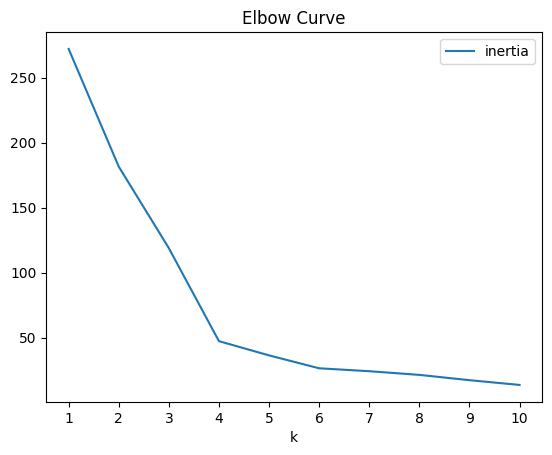

In [39]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plot = df_elbow.plot.line(x="k", y="inertia", title="Elbow Curve", xticks=k)

#### Answer the following questions:
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [40]:
# Initialize the K-Means model using the best value for k
model_Kmeans = KMeans(n_clusters=4, random_state=0)

In [41]:
# Fit the K-Means model using the PCA data
model_Kmeans.fit(pca_df)

KMeans(n_clusters=4, random_state=0)

In [42]:
# Predict the clusters to group the cryptocurrencies using the PCA data
model_Kmeans.predict(pca_df)

# Print the resulting array of cluster values.
model_Kmeans.predict(pca_df)

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0],
      dtype=int32)

In [43]:
# Create a copy of the DataFrame with the PCA data
pca_df_predictions = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_df_predictions["class"] = model_Kmeans.predict(pca_df)

# Display sample data
pca_df_predictions.head()

,principal component 1,principal component 2,principal component 3,class
coin_id,,,,
bitcoin,0.102716,1.092940,0.535184,2
ethereum,0.076712,0.704779,1.036855,2
tether,-0.619999,0.019769,-0.654034,0
ripple,-0.664725,-0.002174,-0.485221,0
bitcoin-cash,0.288739,2.437009,1.799157,2


In [53]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`.
pca_df_predictions.hvplot.scatter(x="principal component 1", y="principal component 2", by="class")

AttributeError: 'DataFrame' object has no attribute 'hvplot'

### Determine the Weights of Each Feature on each Principal Component

In [69]:
# Use the columns from the original scaled DataFrame as the index.
pca_df_predictions.index = market_data_df_scaled.index

# Display sample data
display(pca_df_predictions.sort_values("principal component 1").head())
display(pca_df_predictions.sort_values("principal component 1").tail())
display(pca_df_predictions.sort_values("principal component 2").head())
display(pca_df_predictions.sort_values("principal component 2").tail())

,principal component 1,principal component 2,principal component 3,class
coin_id,,,,
ontology,-1.675994,-1.531960,-0.418537,0
vechain,-1.569882,-1.439604,-1.020839,0
crypto-com-chain,-1.074490,-1.125093,-1.316103,0
iota,-0.994095,-0.085304,0.239578,0
eos,-0.965080,-0.103358,-0.478039,0


,principal component 1,principal component 2,principal component 3,class
coin_id,,,,
nem,0.535096,0.093106,-1.344461,0
monero,1.664453,2.540889,1.219121,2
theta-token,1.925920,-1.480426,-2.267679,0
ethlend,5.549101,-7.263401,2.193574,1
celsius-degree-token,7.752917,3.505336,-2.604195,3


,principal component 1,principal component 2,principal component 3,class
coin_id,,,,
ethlend,5.549101,-7.263401,2.193574,1
havven,-0.445411,-2.407649,0.340272,0
ontology,-1.675994,-1.531960,-0.418537,0
theta-token,1.925920,-1.480426,-2.267679,0
vechain,-1.569882,-1.439604,-1.020839,0


,principal component 1,principal component 2,principal component 3,class
coin_id,,,,
bitcoin,0.102716,1.092940,0.535184,2
binancecoin,0.442508,1.522540,0.787047,2
bitcoin-cash,0.288739,2.437009,1.799157,2
monero,1.664453,2.540889,1.219121,2
celsius-degree-token,7.752917,3.505336,-2.604195,3


#### Answer the following question:

* **Question:** Which features have the strongest positive or negative influence on each component?

* **Answer:** PCA1 Strongest Positive = celsius-degree-token
PCA1 Strongest Negative = ontology
PCA2 Strongest Positive =  celsius-degree-token
PCA2 Strongest Negative = ethland
    